In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
dataset=pd.read_csv('Mall_Customers.csv')

In [17]:
dataset.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [18]:
X=dataset.iloc[:,[3,4]].values

In [19]:
#fitting the model by assigning random no of clusters

In [20]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    y_means=kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)

In [21]:
y_means

array([1, 4, 7, 4, 1, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 1, 4, 1, 4, 1, 4,
       7, 4, 7, 4, 1, 4, 1, 4, 7, 4, 7, 4, 7, 4, 7, 4, 1, 4, 1, 4, 1, 6,
       1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 6, 2, 6, 6, 6, 6, 6,
       6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 5, 2, 0, 3, 5, 3, 5,
       2, 5, 3, 0, 3, 5, 3, 5, 3, 0, 2, 0, 3, 0, 2, 5, 3, 0, 3, 0, 3, 5,
       3, 0, 3, 5, 3, 5, 2, 0, 3, 0, 3, 5, 3, 0, 3, 5, 3, 5, 3, 0, 3, 0,
       3, 5, 3, 0, 3, 0, 3, 0, 3, 0, 3, 8, 3, 8, 3, 8, 9, 8, 9, 8, 9, 8,
       9, 8])

In [22]:
#visualizing the elbow method for choosing the  optimum no of clusters

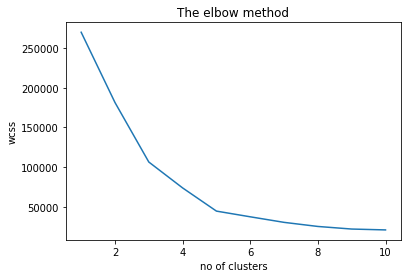

In [23]:
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [24]:
#the elbow value from the graph was found to be 5,now we will seperate the data into 5 clusters

In [25]:
#apply k-means algorithm

In [26]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means=kmeans.fit_predict(X)

In [27]:
#Visualization

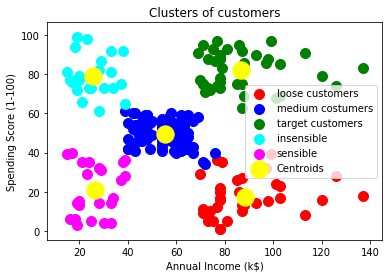

In [31]:
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 100, c = 'red', label = 'loose customers')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 100, c = 'blue', label = 'medium costumers')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 100, c = 'green', label = 'target customers')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s = 100, c = 'cyan', label = 'insensible')
plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], s = 100, c = 'magenta', label = 'sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
#The points in green can be used as target for boosting up the revenues and hence can be send e-mails regarding discounts 
#on a regular basis 